### In this I have gone through all of the different features of data and found many of them to be redundant, specially 'product_rating' and 'overall_rating'. Since there is no rating available for 18151 out of 20000 products bought. But found 'product_category_tree' and 'description' features showing important details about the products bought. So I have implemented NLP model to predict for recommendations based on the processing of bag of words obtained from 'description' feature.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns 
import gc, sys

### Reading dataset

In [2]:
train = pd.read_csv('/home/supershernon/Downloads/ecommerce_sample_dataset.csv')
#dataset :: https://drive.google.com/drive/folders/1lqYy4OvsjdkGZX46JzZW1DW-phmGNhND

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [4]:
train.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [5]:
products=train['product_name'].unique()
len(products)

12676

### There are 12676 unique products in this dataset

In [6]:
category_tree=train['product_category_tree']
print(type(category_tree[7]),'\n')
print(category_tree[7],'\n')
print(len([train[train['product_category_tree'].isnull()]]))

<class 'str'> 

["Furniture >> Living Room Furniture >> Sofa Beds & Futons >> FabHomeDecor Fabric Double Sofa Bed (Finish Colo..."] 

1


### 'product_category_tree' is of type string

In [7]:
train['is_FK_Advantage_product'].value_counts()

False    19215
True       785
Name: is_FK_Advantage_product, dtype: int64

### Above details shows that 'is_FK_Advantage_product' is not an important feature

In [8]:
not_a_brand=train[train['brand'].isnull()]
brand=train['brand'].unique()
print(len(not_a_brand))
print(len(brand))
train['brand'].describe()

5864
3500


count           14136
unique           3499
top       Allure Auto
freq              469
Name: brand, dtype: object

### We can see that 5864 products have not been specified any brand. There is a lot of missing 'brand' values

In [9]:
train['description'][0]

"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts"

In [10]:
product_specifications=train['product_specifications']
print(len(product_specifications),'\n')
print(product_specifications[0])

20000 

{"product_specification"=>[{"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 3"}, {"key"=>"Fabric", "value"=>"Cotton Lycra"}, {"key"=>"Type", "value"=>"Cycling Shorts"}, {"key"=>"Pattern", "value"=>"Solid"}, {"key"=>"Ideal For", "value"=>"Women's"}, {"value"=>"Gentle Machine Wash in Lukewarm Water, Do Not Bleach"}, {"key"=>"Style Code", "value"=>"ALTHT_3P_21"}, {"value"=>"3 shorts"}]}


### We can see that all the important details in 'product_specifications' feature is shown by corresponding 'description' feature.

In [11]:
rating=train['product_rating'].unique()
print(len(rating))
product_rating = train['product_rating'].value_counts(sort=True)
product_rating.head()

36


No rating available    18151
5                        620
4                        246
1                        171
3                        168
Name: product_rating, dtype: int64

In [12]:
train['overall_rating'].value_counts(sort=True).head()

No rating available    18151
5                        620
4                        246
1                        171
3                        168
Name: overall_rating, dtype: int64

### There are 36 different types of rating in this dataset but the products has been rated very very few times compared to the number of times products bought, thus showing better prediction can't be designed on this feature.

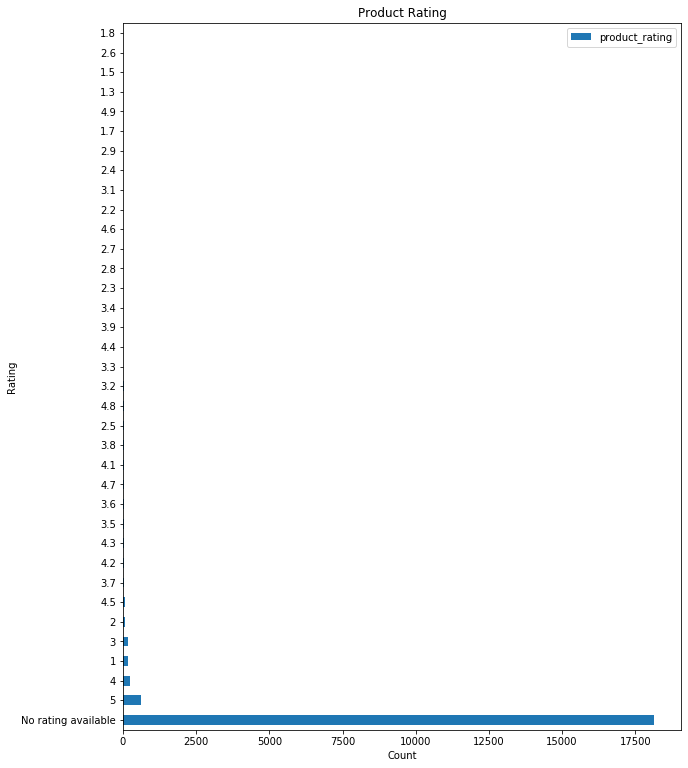

In [13]:
plt.figure(figsize=(10,13))
plt.rc("font", size=10)
train.product_rating.value_counts(sort=True).plot(kind='barh')
plt.title("Product Rating")
plt.xlabel('Count')
plt.ylabel('Rating')
plt.legend(loc='best')
plt.show()

### Top 20 Popular Brands

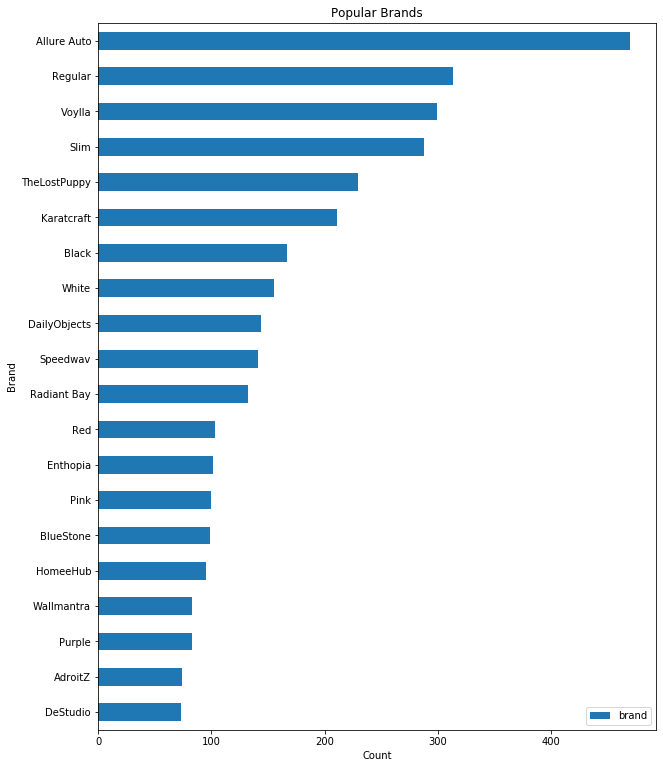

In [14]:
plt.figure(figsize=(10,13))
plt.rc("font", size=10)
train['brand'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title("Popular Brands")
plt.xlabel('Count')
plt.ylabel('Brand')
plt.legend(loc='best')
plt.show()

### Below I have counted numbers of each of the unique products in the dataframe and took these values in another dataframe then merged this dataframe to 'train'.

In [15]:
def drop_y(df):
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)
    
product_count = train['product_name'].value_counts().reset_index().rename(columns = {'product_name': 'product_count', 'index': 'product_name'})
print("Number of Unique products = {}" .format(len(product_count)))
train = pd.merge(left=train, right=product_count, on="product_name", how="left", suffixes=('', '_y'))
drop_y(train)
train.head()

Number of Unique products = 12676


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_count
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",7
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",4
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",1
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",7
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",1


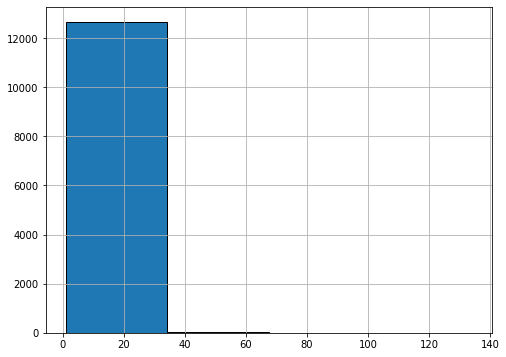

In [16]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
train['product_name'].value_counts().sort_values(ascending=False).hist(bins=4)

### We can see that out of 12676 different types of products (12676-15)=12661 products have less than 40 counts per product type.

### Method I - Using Natural Language Processing

### Took feature 'description' to apply NLP using only it and dropped duplicate rows

In [17]:
flask=train[['product_name','description']]
flask = flask.drop_duplicates(subset='product_name')
flask.reset_index(drop=True, inplace = True)
flask.head()

,product_name,description
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...
3,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...
4,Eternal Gandhi Super Series Crystal Paper Weig...,Key Features of Eternal Gandhi Super Series Cr...


### I have implemented model using Tfidfvectorizer which converts a collection of raw documents to a matrix of TF-IDF features.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

flask['description'] = flask['description'].fillna('')

### Fitting the TF-IDF on the texts of 'description'

In [ ]:
tfv_matrix = tfv.fit_transform(flask['description'])

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)
print(sig[0])

In [ ]:
print(type(tfv_matrix))
tfv_matrix.shape

### Reverse mapping of indices and product_name

In [ ]:
indices = pd.Series(flask.index, index=flask['product_name']).drop_duplicates()
print(indices)

### Function to output top 5 similar products

In [ ]:
def give_rec(title, sig=sig):

    idx = indices[title]
 
    sig_scores = list(enumerate(sig[idx]))
 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    sig_scores = sig_scores[1:6]

    product_indices = [i[0] for i in sig_scores]

    return flask['product_name'].iloc[product_indices]

### Put 'product_name' value within "" below to get similar products

In [ ]:
give_rec("Kanha poshak Wooden All Purpose Chowki")

In [ ]:
name = flask['product_name'].iloc[8]
des = flask['description'].iloc[8]
print(name,'\n')
print(des)

### Method II - Using weighted average value of different features of items present in a specific product category of the given product

### I found these features most important for recommendation as these together contain enough details about product.

In [40]:
df = train.copy()
df = df[['product_name', 'product_category_tree', 'description', 'product_count', 'retail_price', 'discounted_price']]

### Dropping duplicate rows

In [41]:
df.drop_duplicates(subset='product_name', inplace=True)
df.reset_index(inplace=True, drop=True)
print(df.duplicated().value_counts())
df.head(10)

False    12676
dtype: int64


,product_name,product_category_tree,description,product_count,retail_price,discounted_price
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,7,999.0,379.0
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,4,32157.0,22646.0
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,1,999.0,499.0
3,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,1,220.0,210.0
4,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",Key Features of Eternal Gandhi Super Series Cr...,1,430.0,430.0
5,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...","Key Features of dilli bazaaar Bellies, Corpora...",1,699.0,349.0
6,Ladela Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of Ladela Bellies Brand: LADELA C...,1,1724.0,950.0
7,Carrel Printed Women's,"[""Clothing >> Women's Clothing >> Sports & Gym...",Key Features of Carrel Printed Women's Fabric:...,2,2299.0,910.0
8,Sicons All Purpose Tea Tree Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Tea Tree ...,1,NaN,NaN
9,Freelance Vacuum Bottles 350 ml Bottle,"[""Pens & Stationery >> School Supplies >> Wate...",Specifications of Freelance Vacuum Bottles 350...,1,699.0,699.0


### Below are the functions I defined and applied to extract details about sub-category from 'product_category_tree'

In [42]:
df['MainCategory'] = df['product_category_tree'].apply(lambda x: x.split(' >>')[0][2:])

def secondary(x):
    try:
        return x.split(' >>')[1][1:]
    except IndexError:
        return 'None'
    
def tertiary(x):
    try:
        return x.split(' >>')[2][1:]
    except IndexError:
        return 'None'
    
def quaternary(x):
    try:
        return x.split(' >>')[3][1:]
    except IndexError:
        return 'None'

def enhance(x):
    try:
        return x.split('"]')[0]
    except IndexError:
        return 'None'

In [43]:
df['SecondaryCategory'] = df['product_category_tree'].apply(secondary)
df['SecondaryCategory'] = df['SecondaryCategory'].apply(enhance)
df['TertiaryCategory'] = df['product_category_tree'].apply(tertiary)
df['TertiaryCategory'] = df['TertiaryCategory'].apply(enhance)
df['QuaternaryCategory'] = df['product_category_tree'].apply(quaternary)
df['QuaternaryCategory'] = df['QuaternaryCategory'].apply(enhance)

### Dropping product_category_tree and rows containing NaN values of retail_price

In [44]:
df.drop(columns=['product_category_tree'], inplace=True)
df.dropna(axis = 0, subset = ['retail_price'], inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,product_name,description,product_count,retail_price,discounted_price,MainCategory,SecondaryCategory,TertiaryCategory,QuaternaryCategory
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,7,999.0,379.0,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,4,32157.0,22646.0,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,1,999.0,499.0,Footwear,Women's Footwear,Ballerinas,AW Bellies
3,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,1,220.0,210.0,Pet Supplies,Grooming,Skin & Coat Care,Shampoo
4,Eternal Gandhi Super Series Crystal Paper Weig...,Key Features of Eternal Gandhi Super Series Cr...,1,430.0,430.0,Eternal Gandhi Super Series Crystal Paper Weig...,None,None,None


### Froming groups for each of the product sub-category

In [45]:
df['product_name'][4]

'Eternal Gandhi Super Series Crystal Paper Weights  with Silver Finish'

In [46]:
MainCategory = (df.groupby(by = ['MainCategory']))
SecondaryCategory = (df.groupby(by = ['SecondaryCategory']))
TertiaryCategory = (df.groupby(by = ['TertiaryCategory']))
QuaternaryCategory = (df.groupby(by = ['QuaternaryCategory']))

In [47]:
print("Types of Main Category = {}".format(len(MainCategory)))
print("Types of Secondary Category = {}".format(len(SecondaryCategory)))
print("Types of Tertiary Category = {}".format(len(TertiaryCategory)))
print("Types of Quaternary Category = {}".format(len(QuaternaryCategory)))

Types of Main Category = 235
Types of Secondary Category = 213
Types of Tertiary Category = 859
Types of Quaternary Category = 2274


### Distribution of products in groups of MainCategory and SecondaryCategory 

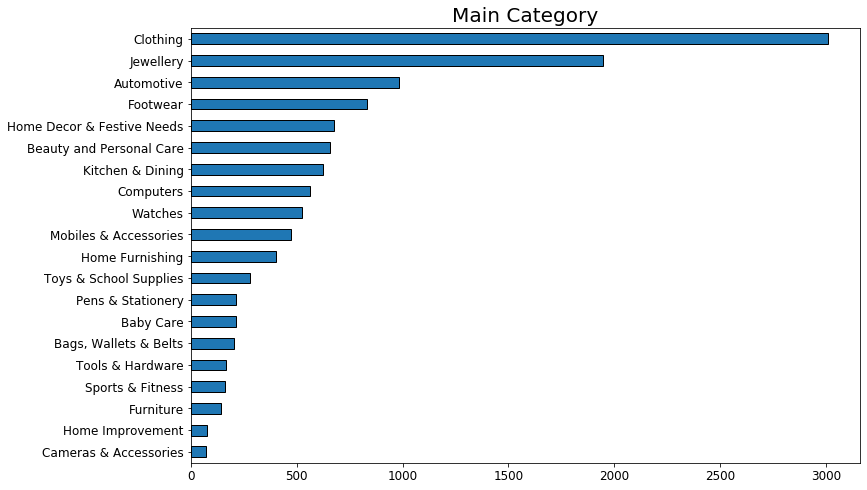

Top Ten Main Categories by Sales.

Clothing                      3009
Jewellery                     1945
Automotive                     984
Footwear                       831
Home Decor & Festive Needs     677
Beauty and Personal Care       658
Kitchen & Dining               624
Computers                      564
Watches                        528
Mobiles & Accessories          473
Name: MainCategory, dtype: int64


In [48]:
plt.figure(figsize=(12,8))
df['MainCategory'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Main Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
print('Top Ten Main Categories by Sales.\n')
print(df['MainCategory'].value_counts()[:10])

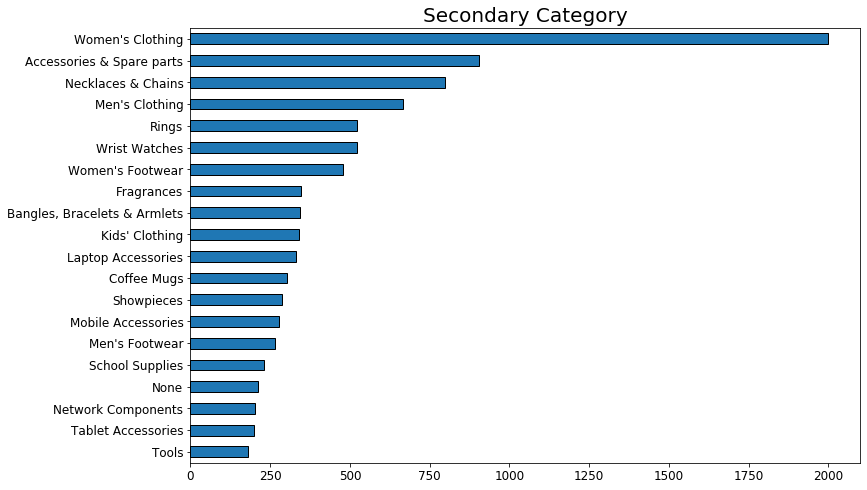

Top Ten Secondary Categories by Sales.

Women's Clothing                1999
Accessories & Spare parts        905
Necklaces & Chains               797
Men's Clothing                   666
Rings                            522
Wrist Watches                    521
Women's Footwear                 479
Fragrances                       345
Bangles, Bracelets & Armlets     344
Kids' Clothing                   341
Name: SecondaryCategory, dtype: int64


In [49]:
plt.figure(figsize=(12,8))
df['SecondaryCategory'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Secondary Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
print('Top Ten Secondary Categories by Sales.\n')
print(df['SecondaryCategory'].value_counts()[:10])

### Function get products classified according to its class values

In [50]:
def classifyby(product_row):
    
    if product_row['QuaternaryCategory'][i] != 'None':
        category = product_row['QuaternaryCategory'][i]
        value = QuaternaryCategory.get_group(category)
        
    elif product_row['TertiaryCategory'][i] != 'None':
        category = product_row['TertiaryCategory'][i]
        value = TertiaryCategory.get_group(category)
        
    elif product_row['SecondaryCategory'][i] != 'None':
        category = product_row['SecondaryCategory'][i]
        value = SecondaryCategory.get_group(category)
        
    else:
        category = product_row['MainCategory'][i]
        value = MainCategory.get_group(category)
    
    return value
    

### Put 'product_name' value within "" below to get similar products

In [51]:
product_row = df[df['product_name']=="Glus Wedding Lingerie Set"]
i = product_row.index[0]
text = product_row['SecondaryCategory'][i]
print(text)

Women's Clothing


In [52]:
tester = classifyby(product_row)
tester.head(6)

,product_name,description,product_count,retail_price,discounted_price,MainCategory,SecondaryCategory,TertiaryCategory,QuaternaryCategory
14,Glus Wedding Lingerie Set,Glus Wedding Lingerie Set - Buy Turquoise Glus...,1,1299.0,699.0,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Lingerie Sets
328,Lovelady Wedding Lingerie Set,Lovelady Wedding Lingerie Set\n ...,1,895.0,725.0,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Lingerie Sets
1053,Hers by Herman Lingerie Set,Key Features of Hers by Herman Lingerie Set Fa...,1,2443.0,999.0,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Lingerie Sets
1055,UR Image Lingerie Set,Key Features of UR Image Lingerie Set Fabric: ...,1,599.0,399.0,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Lingerie Sets
1123,Da Intimo Casual Lingerie Set,Da Intimo Casual Lingerie Set - Buy Black Da I...,1,1599.0,1599.0,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Lingerie Sets
1128,Roxy Beach Wear Lingerie Set,Roxy Beach Wear Lingerie Set\n ...,1,3995.0,1997.0,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Lingerie Sets


### More accuracy can be achieved by taking into account 'retail_price' and 'description' features